# Table of Contents 
## 01. Import Data and Libraries

## 02. Data Wrangling and Cleaning

## 03. Checking for Extreme Values 

## 04. Plotting a Choropleth 
### - Number Killed
### - Number Injured

## 05. Analyzing Results

## 06. Exporting New Dataframe

------------

# 01. Import Data and Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly.express as px

In [2]:
#uploading the united states json file

country_geo= r'C:\Users/princess\Downloads\12-23 Gun Violence Analysis\02 Data/Original Data\us-states.json'

In [3]:
country_geo

'C:\\Users/princess\\Downloads\\12-23 Gun Violence Analysis\\02 Data/Original Data\\us-states.json'

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
# looking at the JSON file contents:

f = open(r'C:\Users/princess\Downloads\12-23 Gun Violence Analysis\02 Data/Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
path= r'C:\Users\princess\Downloads\12-23 Gun Violence Analysis'

In [7]:
# import the cleaned data from the last exercise 

gv_data= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'new_6.2_gun_violence_cleaned.csv'))

In [8]:
gv_data.head()

,Unnamed: 0,Incident ID,Date,State,City or County,Address,Number Killed,Number Injured,Congressional District,Gun Type,...,Participant Age Groups,Participant Genders,Participant Names,Participant Relationships,Participant Statuses,Participant Types,Latitude_Bin,Longitude_Bin,Location_Combined,Location Combined
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4.0,3.0,4.0_3.0,0
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,1.0,2.0_1.0,1
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4.0,3.0,4.0_3.0,0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,2.0,3.0_2.0,2
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,3.0,3.0_3.0,3


----------

# 02. Data Wrangling and Cleaning

In [9]:
#Deleted unnecessary columns
gv_data = gv_data.drop(columns=['Unnamed: 0', 'Participant Names', 'Participant Relationships', 'Location_Combined', 'Longitude_Bin','Latitude_Bin', 
                               'Gun Type'])

In [10]:
# will create new date and time columns for the dataset, such as year, month, and weekday
gv_data['Date'] = pd.to_datetime(gv_data['Date'])

In [11]:
gv_data['Year'] = gv_data['Date'].dt.year

In [12]:
gv_data['Month'] = gv_data['Date'].dt.month

In [13]:
gv_data['Weekday'] = gv_data['Date'].dt.weekday

In [14]:
gv_data.head()

,Incident ID,Date,State,City or County,Address,Number Killed,Number Injured,Congressional District,Incident Characteristics,Latitude,...,Notes,Participant Ages,Participant Age Groups,Participant Genders,Participant Statuses,Participant Types,Location Combined,Year,Month,Weekday
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,2013,1,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,1,2013,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,0,2013,1,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2,2013,1,5
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,2013,1,0


In [15]:
def generic_split(n) :                    
    generic_rows = []               
    generic_row = str(n).split("||")     
    for i in generic_row :              
        g_row = str(i).split("::")              
        if len(g_row) > 1 :         
            generic_rows.append(g_row[1])           
    return generic_rows

In [16]:
gv_data.dtypes

Incident ID                          int64
Date                        datetime64[ns]
State                               object
City or County                      object
Address                             object
Number Killed                        int64
Number Injured                       int64
Congressional District             float64
Incident Characteristics            object
Latitude                           float64
Location Description                object
Longitude                          float64
Number of Guns Involved            float64
Notes                               object
Participant Ages                    object
Participant Age Groups              object
Participant Genders                 object
Participant Statuses                object
Participant Types                   object
Location Combined                    int64
Year                                 int32
Month                                int32
Weekday                              int32
dtype: obje

In [17]:
# Split the participant gender to count the number of Males/Females to make it easier to understand
gv_data_genders = gv_data['Participant Genders'].apply(generic_split)

# Create new columns for total people, male, and female using .loc since there was a warning before without using .loc
gv_data.loc[:, "Total Participants"] = gv_data_genders.apply(lambda x: len(x))
gv_data.loc[:, "Male Participants"] = gv_data_genders.apply(lambda i: i.count("Male"))
gv_data.loc[:, "Female Participants"] = gv_data_genders.apply(lambda i: i.count("Female"))

In [18]:
# split "Participant Age Groups"  as per age group 
gv_data_agegrp = gv_data['Participant Age Groups'].apply(generic_split)
gv_data["Child Participants 0-11"] = gv_data_agegrp.apply(lambda i: i.count("Child 0-11"))
gv_data["Teen Participants 12-17"] = gv_data_agegrp.apply(lambda i: i.count("Teen 12-17"))
gv_data["Adult Participants 18+"] = gv_data_agegrp.apply(lambda i: i.count("Adult 18+"))

In [19]:
# Replace NaN values with an empty string or any other suitable placeholder
gv_data['Participant Types'].fillna('', inplace=True)

In [20]:
# Function to count participants based on type
def count_participants(entry, participant_type):
    try:
        return len([p.split('::')[1] for p in entry.split('||') if participant_type in p])
    except IndexError:
        return 0

In [21]:
# Create columns for the count of victims and suspects
gv_data['Victim Count'] = gv_data['Participant Types'].apply(lambda x: count_participants(x, 'Victim'))
gv_data['Suspect Count'] = gv_data['Participant Types'].apply(lambda x: count_participants(x, 'Subject-Suspect'))

In [22]:
# Display the resulting DataFrame
gv_data[['Participant Types', 'Victim Count', 'Suspect Count']]

,Participant Types,Victim Count,Suspect Count
0,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
1,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
2,0::Subject-Suspect||1::Subject-Suspect||2::Vic...,3,2
3,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
4,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
...,...,...,...
239672,0::Subject-Suspect,0,1
239673,0::Victim||1::Subject-Suspect,1,1
239674,0::Victim,1,0
239675,0::Victim,1,0


In [23]:
gv_data.columns.tolist()

['Incident ID',
 'Date',
 'State',
 'City or County',
 'Address',
 'Number Killed',
 'Number Injured',
 'Congressional District',
 'Incident Characteristics',
 'Latitude',
 'Location Description',
 'Longitude',
 'Number of Guns Involved',
 'Notes',
 'Participant Ages',
 'Participant Age Groups',
 'Participant Genders',
 'Participant Statuses',
 'Participant Types',
 'Location Combined',
 'Year',
 'Month',
 'Weekday',
 'Total Participants',
 'Male Participants',
 'Female Participants',
 'Child Participants 0-11',
 'Teen Participants 12-17',
 'Adult Participants 18+',
 'Victim Count',
 'Suspect Count']

In [24]:
gv_data.head()

,Incident ID,Date,State,City or County,Address,Number Killed,Number Injured,Congressional District,Incident Characteristics,Latitude,...,Month,Weekday,Total Participants,Male Participants,Female Participants,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Victim Count,Suspect Count
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,1,1,4,3,1,0,0,5,4,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,1,1,1,1,0,0,0,4,4,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,1,1,5,5,0,0,0,5,3,2
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,1,5,4,3,1,0,0,4,3,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,1,0,4,2,2,0,1,3,3,1


In [25]:
# the original order of columns in case i need to call upon it by chance
original_columns = gv_data.columns.tolist()

In [26]:
# Specify the desired order of columns
desired_column_order = [
    'Incident ID', 'Date', 'Year', 'Month', 'Weekday',
    'State', 'City or County', 'Address', 'Number Killed', 'Number Injured', 'Number of Guns Involved', 
    'Incident Characteristics', 'Congressional District', 'Latitude', 'Longitude', 'Location Combined', 'Location Description',
    'Notes', 'Participant Ages', 'Participant Age Groups', 'Child Participants 0-11', 'Teen Participants 12-17',
    'Adult Participants 18+','Participant Genders', 'Total Participants', 'Male Participants',
    'Female Participants', 'Participant Statuses', 'Participant Types', 'Victim Count', 'Suspect Count' ]

In [27]:
# Create a new data frame with the desired column order
gv_df = gv_data[desired_column_order]

In [28]:
gv_df

,Incident ID,Date,Year,Month,Weekday,State,City or County,Address,Number Killed,Number Injured,...,Teen Participants 12-17,Adult Participants 18+,Participant Genders,Total Participants,Male Participants,Female Participants,Participant Statuses,Participant Types,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,...,0,5,0::Male||1::Male||3::Male||4::Female,4,3,1,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,...,0,4,0::Male,1,1,0,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3,...,0,5,0::Male||1::Male||2::Male||3::Male||4::Male,5,5,0,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,...,0,4,0::Female||1::Male||2::Male||3::Male,4,3,1,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,...,1,3,0::Female||1::Male||2::Male||3::Female,4,2,2,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,2018,3,5,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,...,0,1,0::Female,1,0,1,"0::Unharmed, Arrested",0::Subject-Suspect,0,1
239673,1083139,2018-03-31,2018,3,5,Louisiana,Natchitoches,247 Keyser Ave,1,0,...,0,2,0::Male||1::Male,2,2,0,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1,1
239674,1083151,2018-03-31,2018,3,5,Louisiana,Gretna,1300 block of Cook Street,0,1,...,0,1,0::Male,1,1,0,0::Injured,0::Victim,1,0
239675,1082514,2018-03-31,2018,3,5,Texas,Houston,12630 Ashford Point Dr,1,0,...,0,1,0::Male,1,1,0,0::Killed,0::Victim,1,0


In [29]:
# remove any extra unneccessary columns that i no longer need

gv_df = gv_df.drop(columns=['Participant Statuses', 'Participant Types', 'Participant Genders', 'Participant Age Groups', 'Participant Ages'])

In [30]:
gv_df.columns.tolist()

['Incident ID',
 'Date',
 'Year',
 'Month',
 'Weekday',
 'State',
 'City or County',
 'Address',
 'Number Killed',
 'Number Injured',
 'Number of Guns Involved',
 'Incident Characteristics',
 'Congressional District',
 'Latitude',
 'Longitude',
 'Location Combined',
 'Location Description',
 'Notes',
 'Child Participants 0-11',
 'Teen Participants 12-17',
 'Adult Participants 18+',
 'Total Participants',
 'Male Participants',
 'Female Participants',
 'Victim Count',
 'Suspect Count']

In [31]:
gv_df

,Incident ID,Date,Year,Month,Weekday,State,City or County,Address,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,2018,3,5,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,...,NaN,NaN,0,0,1,1,0,1,0,1
239673,1083139,2018-03-31,2018,3,5,Louisiana,Natchitoches,247 Keyser Ave,1,0,...,Shop Rite,NaN,0,0,2,2,2,0,1,1
239674,1083151,2018-03-31,2018,3,5,Louisiana,Gretna,1300 block of Cook Street,0,1,...,NaN,NaN,0,0,1,1,1,0,1,0
239675,1082514,2018-03-31,2018,3,5,Texas,Houston,12630 Ashford Point Dr,1,0,...,Vanderbilt Court apartments,"Vic was found shot to death in car on 4/1/18, ...",0,0,1,1,1,0,1,0


In [32]:
gv_df.dtypes

Incident ID                          int64
Date                        datetime64[ns]
Year                                 int32
Month                                int32
Weekday                              int32
State                               object
City or County                      object
Address                             object
Number Killed                        int64
Number Injured                       int64
Number of Guns Involved            float64
Incident Characteristics            object
Congressional District             float64
Latitude                           float64
Longitude                          float64
Location Combined                    int64
Location Description                object
Notes                               object
Child Participants 0-11              int64
Teen Participants 12-17              int64
Adult Participants 18+               int64
Total Participants                   int64
Male Participants                    int64
Female Part

---------

# 03. Checking for Extreme Values

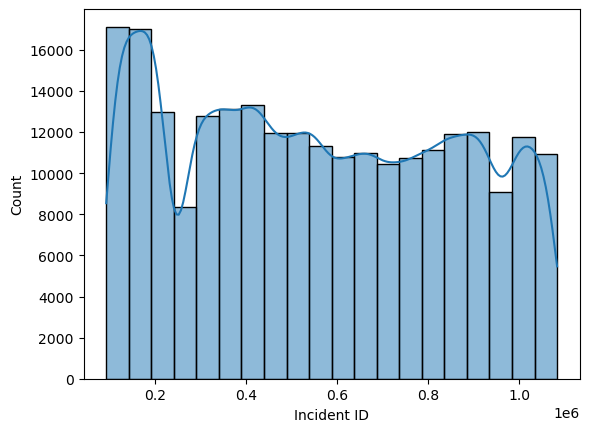

In [33]:
# creating a histogram for extreme values for incident id
hist_incident_id = sns.histplot(gv_df['Incident ID'], bins = 20, kde = True)

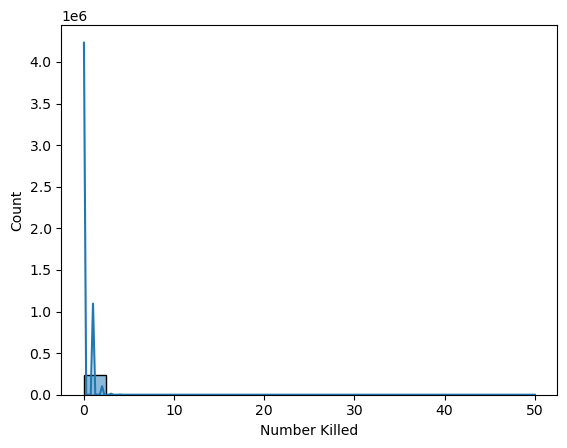

In [34]:
# creating a histogram for extreme values for number killed
hist_num_killed = sns.histplot(gv_df['Number Killed'], bins = 20, kde = True)

Already know that the extreme values are from mass shootings. I am unsure if they add value to the dataset though, will need to do further analysis to figure out if I should drop them.

------------

# 04. Plotting a Choropleth

## Number Killed

In [35]:
# Creating a data frame with just the states and the values for number killed per individual incident

n_killed_1 = gv_df[['State','Number Killed']]
n_killed_1.head()

,State,Number Killed
0,Pennsylvania,0
1,California,1
2,Ohio,1
3,Colorado,4
4,North Carolina,2


In [36]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_killed_1,
    columns = ['State', 'Number Killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Killed Participants per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
# Creating a data frame with just the states and the values for number killed in total for each state

n_killed = gv_df.groupby('State')['Number Killed'].sum().sort_values(ascending=False).reset_index()
n_killed.head()

,State,Number Killed
0,California,5562
1,Texas,5046
2,Florida,3909
3,Illinois,3409
4,Ohio,2508


In [38]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

folium.Choropleth(
    geo_data=country_geo,
    data=n_killed,
    columns=['State', 'Number Killed'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name=" Total Number of Killed Participants per State"
).add_to(map)

folium.LayerControl().add_to(map)
map

In [39]:
# saving html to file path
map.save(os.path.join(path, '04 Analysis', 'Visualizations',
'n_killed_total_per_state.html'))

## Number Injured

In [40]:
# Creating a data frame with just the states and the values for number injured per individual incident
n_injured_1 = gv_df[['State','Number Injured']]
n_injured_1.head()

,State,Number Injured
0,Pennsylvania,4
1,California,3
2,Ohio,3
3,Colorado,0
4,North Carolina,2


In [41]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_injured_1,
    columns = ['State', 'Number Injured'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Injured Participants per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [42]:
# Creating a data frame with just the states and the values for number injured in total for each state

n_injured = gv_df.groupby('State')['Number Injured'].sum().sort_values(ascending=False).reset_index()
n_injured.head()

,State,Number Injured
0,Illinois,13514
1,California,7644
2,Florida,7072
3,Texas,6106
4,Ohio,5703


In [43]:
#setting up a folium map with a high level zoom

map = folium.Map(location=[100, 0], zoom_start=1.5)

folium.Choropleth(
    geo_data=country_geo,
    data=n_injured,
    columns=['State', 'Number Injured'],
    key_on='feature.properties.name',
    fill_color='PuBu',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name=" Total Number of Injured Participants per State"
).add_to(map)

folium.LayerControl().add_to(map)
map

In [44]:
# saving html to file path
map.save(os.path.join(path, '04 Analysis', 'Visualizations',
'n_injured_total_per_state.html'))

---------

# 05. Analyzing Results

### My current hypotheses:

1. Does the frequency of gun violence incidents vary significantly across different states and cities?

2. Are there temporal patterns in gun violence incidents, such as monthly or yearly trends?

3. Do urban areas experience a higher frequency of gun violence incidents compared to rural areas?

4. Is the severity of incidents, measured by the number of victims or fatalities,  influenced by  factors such as location or time?

5. Are certain demographics or groups disproportionately affected by gun violence?

#### As seen from the graphs, we can answer #1 and #3 or at least begin to. Injuries and deaths do vary across states, cities will be an analysis in the near future. I have noticed that a lot of gun related incidents occur on the Eastern side of the United States. California was in the top 2 for every dataframe I did thus far, which means that as of right now, California is looking like one of the more dangerous states in terms of gun related incidents. California is also a very urban state, with most residents living in urban areas. Texas and Florida are also very urban and their gun related incidents were also quite high. As for urban areas, such as Illinois, the gun related instances were high as well, but overall there does not seem to be a pattern of whether one of the other experiences higher frequencies. Looking into other variables, such as gender and age groups will help figure out hypothesis #5. Hypothesis #4 can also be figured out by looking at a temporal analysis. However, by the maps chosen, it can also be said that certain locations' severities do vary. The number of injuries vs deaths vary based on location. However, the top 5 states are in the top 5 for both total injuries and deaths, even if the order is different. For states other than the top 5, perhaps deeper analysis can be done on this in Tableau.

-----------

# 06. Extracting New Dataframe

In [45]:
# exporting df to csv
gv_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data',
'6.3_gun_violence_cleaned.csv'))